In [2]:
import numpy as np

1 - Represnting and Solving System of Linear Equations using Matrices

1.1 - System of Linear Equations

A system of linear equations (or linear system) is a collection of one or more linear equations involving the same variables. For example:

 {-x1 + 3x2 = 7
  ,3x2 + 2x2 = 1}            - (1)
 
is a system of two equations with two unknown variables x1, x2.
To solve a system of linear equations means to find such values of the variables x1, x2 that all of its equations are simultaneously satisfied.

A linear system is inconsistent if it has no solution, and otherwise it is said to be consistent. Consistent system can have one or infinite number of solutions.

1.2 - Solving Systems of Linear Equations using Matrices

Linear systems with two equations are easy to solve manually, but preparing for more complicated cases, you will investigate some solution techniques.

NumPy linear algebra package provides quick and reliable way to solve the system of linear equations using function np.linalg.solve(A, b). Here A
 is a matrix, each row of which represents one equation in the system and each column corresponds to the variable x1, x2. And is a 1-D array of the free (right side) coefficients.

Given the system of Linear Equations (1), you can set matrix A and 1-D array b as:

In [7]:
A = np.array([[-1, 3],
             [3, 2],
             ], dtype=np.dtype(float))

b = np.array([7, 1], dtype=np.dtype(float))

print("Matrix A:")
print(A)
print("Matrix b:")
print(b)

Matrix A:
[[-1.  3.]
 [ 3.  2.]]
Matrix b:
[7. 1.]


Check the dimensions of A and b using shape attribute.

In [8]:
print(f"Shape of A: {A.shape}")
print(f"Shape of b: {b.shape}")

Shape of A: (2, 2)
Shape of b: (2,)


Now simply use np.linalg.solve(A, b) function to find the solution of the system (1). The result will be saved in the 1-D array x. The elements will correspond to the values of x1 and x2.

In [9]:
x = np.linalg.solve(A, b)

print(f"Solution: {x}")

Solution: [-1.  2.]


1.3 - Evaluating Determinant of a Matrix

Matrix A corresponding to the linear system (1) is a square matrix - it has the same number of rows and columns. In case of a square matrix it is possible to calculate its determinant - a real number which characterizes some properties of the matrix. Linear system containing two (or more) equations with the same number of unknown variables will have one solution if and only if matrix A has non-zero determinant.

Let's calculate the determinant using NumPy linear algebra package. You can do it with the np.linalg.det(A) function.

In [6]:
d = np.linalg.det(A)

print(f"Determinant of matrix A: {d:.2f}")

Determinant of matrix A: -11.00


2.1 - Elimination Method

In the elimination method you either add or subtract the equations of the linear system to get an equation with smaller number of variables. If needed, you can also multiply whole equation by non-zero number.

Take a look at the system (1) again:

                {-x1 + 3x2 = 7,
                3x1 + 2x2 = 1}  - (1)

Multiply first equation by 3, add it to the second equation and exchange the second equation with the result of this addition:

                {-x1 + 3x2 = 7,
                11x2 = 22}  - (2)

You eliminated variable x1 from the second equation and brought it to the form where, dividing by 11, you can see the solution value for x2 = 2. Now take x2 = 2 in the first equation: 

                {-x1 + 3 x 2 = 7,
                x2 = 2}   - (3)

And find the solution:

                {x1 = -1,
                x2 = 2}   - (4)

2.2 - Preparation for the Implementation of Elimination Method in the Code

Representing the system in a matrix form as [[-1 3 7],
                                             [3 2 1]], 
you can apply the same operations to the rows of the matrix with Python Code

Unify matrix A and array b into one matrix using np.hstack() function. Note that the shape of the originally defined array b was (2,), to stack it with the (2, 2) matrix you need to use .reshape((2, 1)) function:

In [10]:
A_system = np.hstack((A, b.reshape((2, 1))))
print(A_system)

[[-1.  3.  7.]
 [ 3.  2.  1.]]


In [11]:
print(A_system[1])

[3. 2. 1.]


2.3 - Implementation of Elimination Method

Let's apply some operations to the matrix A_system to eliminate variable . First, copy the matrix to keep the original one without any changes. Then multiply first row by 3, add it to the second row and exchange the second row with the result of this addition:

In [12]:
# Function .copy() is used to keep the original matrix without any change
A_system_res = A_system.copy()

In [13]:
A_system_res[1] = 3*A_system[0] + A_system_res[1]
print(A_system_res)

[[-1.  3.  7.]
 [ 0. 11. 22.]]


Multiply second row by 1/11:

In [14]:
A_system_res[1] = 1/11 * A_system_res[1]
print(A_system_res)

[[-1.  3.  7.]
 [ 0.  1.  2.]]


The original matrix A_system was constructed stacking horizontally matrix A and array b. You can read the last row as 0x1 + 1x2 = 2, thus x2 = 2. And the first row as -1x1 + 3x2 = 7. Substitute x2 = 2, you will get x1 = -1.

2.4 - Graphical Representation of the Solution

A linear equation in two variables (here, x1 and x2) is represented geometrically by a line which points (x1, x2) make up the collection of solutions of the equation. This is called the graph of the linear equation. In case of the system of two equations there will be two lines corresponding to each of the equations, and the solution will be the intersection point of those lines.

In the following code you will define a function plot_lines() to plot the lines and use it later to represent the solution which you found earlier. Do not worry if the code in the following cell will not be clear - at this stage this is not important code to understand.

In [15]:
import matplotlib.pyplot as plt

def plot_lines(M):
    x_1 = np.linspace(-10,10,100)
    x_2_line_1 = (M[0,2] - M[0,0] * x_1) / M[0,1]
    x_2_line_2 = (M[1,2] - M[1,0] * x_1) / M[1,1]
    
    _, ax = plt.subplots(figsize=(10, 10))
    ax.plot(x_1, x_2_line_1, '-', linewidth=2, color='#0075ff',
        label=f'$x_2={-M[0,0]/M[0,1]:.2f}x_1 + {M[0,2]/M[0,1]:.2f}$')
    ax.plot(x_1, x_2_line_2, '-', linewidth=2, color='#ff7300',
        label=f'$x_2={-M[1,0]/M[1,1]:.2f}x_1 + {M[1,2]/M[1,1]:.2f}$')

    A = M[:, 0:-1]
    b = M[:, -1::].flatten()
    d = np.linalg.det(A)

    if d != 0:
        solution = np.linalg.solve(A,b) 
        ax.plot(solution[0], solution[1], '-o', mfc='none', 
            markersize=10, markeredgecolor='#ff0000', markeredgewidth=2)
        ax.text(solution[0]-0.25, solution[1]+0.75, f'$(${solution[0]:.0f}$,{solution[1]:.0f})$', fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-10, 10))
    ax.set_yticks(np.arange(-10, 10))

    plt.xlabel('$x_1$', size=14)
    plt.ylabel('$x_2$', size=14)
    plt.legend(loc='upper right', fontsize=14)
    plt.axis([-10, 10, -10, 10])

    plt.grid()
    plt.gca().set_aspect("equal")

    plt.show()

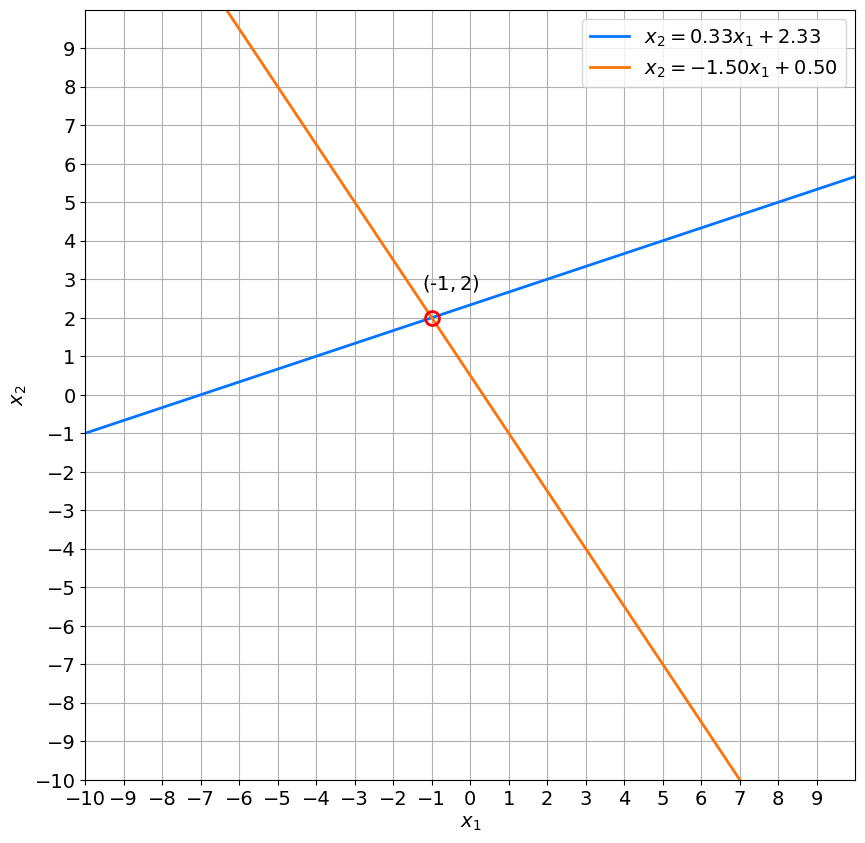

In [16]:
plot_lines(A_system)